In [223]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [224]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [225]:
mouse_drug_data_df = "mouse_drug_data.csv"
clinicaltrial_data_df = "clinicaltrial_data.csv"

In [226]:
mouse_drug_data_df = pd.read_csv("mouse_drug_data.csv")
mouse_drug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [227]:
clinicaltrial_data_df = pd.read_csv("clinicaltrial_data.csv")
clinicaltrial_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [228]:
# Combine the data into a single dataset
merge_table_df = pd.merge(mouse_drug_data_df, clinicaltrial_data_df, on="Mouse ID", how="outer")
merge_table_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [229]:
merge_table_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [230]:
#Drop Metastatic Sites Column
merge_table_df.drop(columns=['Metastatic Sites'])

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3)
0,f234,Stelasyn,0,45.000000
1,f234,Stelasyn,5,47.313491
2,f234,Stelasyn,10,47.904324
3,f234,Stelasyn,15,48.735197
4,f234,Stelasyn,20,51.112713
...,...,...,...,...
1901,j235,Placebo,0,45.000000
1902,j235,Placebo,5,46.588820
1903,j235,Placebo,10,48.018788
1904,j235,Placebo,15,51.161138


Tumor Response to Treatment

In [231]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_tumor_vol_df = pd.DataFrame(
    {"Drug": merge_table_df['Drug'], "Timepoint": merge_table_df['Timepoint'], 
                                     "Tumor Volume (mm3)": merge_table_df['Tumor Volume (mm3)']})
grouped_tumor_vol_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713
...,...,...,...
1901,Placebo,0,45.000000
1902,Placebo,5,46.588820
1903,Placebo,10,48.018788
1904,Placebo,15,51.161138


In [232]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_error_drug_df = grouped_tumor_vol_df.groupby(['Drug', 'Timepoint']).sem()
stand_error_drug_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [233]:
#Convert the grouped object into a dataframe and then display a preview
stand_error_drug_df = pd.DataFrame(grouped_tumor_vol_df)
stand_error_drug_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713
...,...,...,...
1901,Placebo,0,45.000000
1902,Placebo,5,46.588820
1903,Placebo,10,48.018788
1904,Placebo,15,51.161138


In [234]:
reformatted_df = stand_error_drug_df.reset_index().pivot_table(index= 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
reformatted_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [235]:
reformatted_df.mean()

Drug
Capomulin    40.485084
Ceftamin     53.752434
Infubinol    54.963549
Ketapril     56.806906
Naftisol     55.891024
Placebo      56.012209
Propriva     54.911934
Ramicane     39.986931
Stelasyn     55.981636
Zoniferol    54.660451
dtype: float64

In [236]:
time = list(reformatted_df.index.values)
time

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

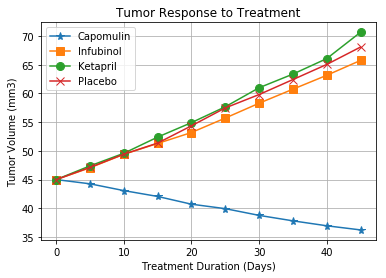

In [237]:
#Tumor Response to Treatment 
plt.grid(True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.title("Tumor Response to Treatment")
plt.errorbar( x = [time], y=reformatted_df ['Capomulin'], marker = "*",ms = 8, label = "Capomulin")
plt.errorbar( x = [time], y=reformatted_df ['Infubinol'], marker = "s",ms = 8, label = "Infubinol")
plt.errorbar( x = [time], y=reformatted_df ['Ketapril'], marker = "o", ms = 8, label = "Ketapril")
plt.errorbar( x = [time], y=reformatted_df ['Placebo'], marker = "x", ms = 8, label = "Placebo")
plt.legend(frameon=True)
plt.savefig('Tumor Response to Treatment.png') 
plt.show()


Metastatic sites

In [238]:
#Create new DataFrame of the metastatic sites grouped by Drug and Timepoint
drug_results_met_df = pd.DataFrame({'Drug' : merge_table_df['Drug'], 'Timepoint' : merge_table_df['Timepoint'], 
                                     'Metastatic Sites' : merge_table_df['Metastatic Sites']})

drug_results_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2


In [239]:
# Store the average Metastatic Site Data Grouped by Drug and Timepoint 
drug_mets_grp = drug_results_met_df.groupby(['Drug', 'Timepoint'])
drug_mets_grp.mean()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [240]:
#rename the mets column Average Met Sites and preview the dataframe
drug_mets_grp.columns = ['Drug', 'Timepoint', 'Average Met Sites']
drug_mets_grp.head(10)

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0
2,Stelasyn,10,0
3,Stelasyn,15,1
4,Stelasyn,20,2
...,...,...,...
1845,Placebo,45,3
1854,Placebo,40,4
1855,Placebo,45,4
1870,Placebo,40,4


In [241]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem_grp = drug_results_met_df.groupby(['Drug', 'Timepoint']).sem()

In [242]:
#Convert the grouped object into a dataframe and then display a preview
drug_mets_sem_df = pd.DataFrame(met_sem_grp.reset_index())
drug_mets_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [243]:
#Reformatted data
drug_results_met_df = drug_results_met_df.reset_index().pivot_table(index= 'Timepoint', 
                                                                    columns='Drug', 
                                                                    values= 'Metastatic Sites')
drug_results_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


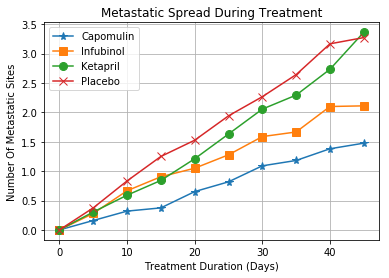

In [244]:
plt.grid(True)
plt.ylabel("Number Of Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic Spread During Treatment")
plt.errorbar( x = [time], y=drug_results_met_df['Capomulin'], marker = "*",ms = 8, label = "Capomulin")
plt.errorbar( x = [time], y=drug_results_met_df ['Infubinol'], marker = "s",ms = 8, label = "Infubinol")
plt.errorbar( x = [time], y=drug_results_met_df ['Ketapril'], marker = "o", ms = 8, label = "Ketapril")
plt.errorbar( x = [time], y=drug_results_met_df ['Placebo'], marker = "x", ms = 8, label = "Placebo")
plt.legend(frameon=True)
plt.savefig('Metastatic Spread During Treatment.png') 
plt.show()


Mice Survival Rates

In [245]:
# Store the Count of Mice Grouped by Drug and Timepoint

#Create a new dataframe that only includes the drug, timepoint and mice columns
drug_results_survival_df = pd.DataFrame({'Drug' : merge_table_df['Drug'], 
                                         'Timepoint' : merge_table_df['Timepoint'],
                                         'Mice' : merge_table_df['Mouse ID']
                                        })
drug_results_survival_df.head()

,Drug,Timepoint,Mice
0,Stelasyn,0,f234
1,Stelasyn,5,f234
2,Stelasyn,10,f234
3,Stelasyn,15,f234
4,Stelasyn,20,f234


In [246]:
#group the dataframe by drug and timepoint
data_mice_count_df = drug_results_survival_df.groupby(['Drug', 'Timepoint'])
data_mice_count_df.head()

,Drug,Timepoint,Mice
0,Stelasyn,0,f234
1,Stelasyn,5,f234
2,Stelasyn,10,f234
3,Stelasyn,15,f234
4,Stelasyn,20,f234
...,...,...,...
1780,Placebo,35,x773
1781,Placebo,40,x773
1782,Placebo,45,x773
1802,Placebo,40,y478


In [247]:
#convert the grouped object into a dataframe and reset the index
survival_count_df = pd.DataFrame(data_mice_count_df.count().reset_index())
survival_count_df.head()

,Drug,Timepoint,Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [248]:
#pivot the table
survival_count_df = survival_count_df.reset_index().pivot_table(index= 'Timepoint', columns='Drug', values='Mice')
survival_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [249]:
survival_percent_df = survival_count_df/25 * 100
survival_percent_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


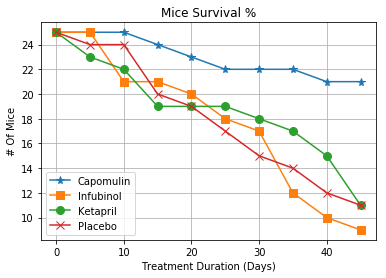

In [250]:
#Plot Survival Rates
plt.grid(True)
plt.ylabel("# Of Mice")
plt.xlabel("Treatment Duration (Days)")
plt.title("Mice Survival %")
plt.errorbar( x = [time], y=survival_count_df ['Capomulin'], marker = "*",ms = 8, label = "Capomulin")
plt.errorbar( x = [time], y=survival_count_df ['Infubinol'], marker = "s",ms = 8, label = "Infubinol")
plt.errorbar( x = [time], y=survival_count_df['Ketapril'], marker = "o", ms = 8, label = "Ketapril")
plt.errorbar( x = [time], y=survival_count_df['Placebo'], marker = "x", ms = 8, label = "Placebo")
plt.legend(frameon=True)
plt.savefig('Mice Survival %.png') 
plt.show()


Summary Bar Graph

In [251]:
#Show the percentages difference from beginning
pct_changes = reformatted_df.pct_change
print(pct_changes)


<bound method NDFrame.pct_change of Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Pro

In [252]:
capomulin = (36.23 - 45)/ 45 *100
capomulin 

-19.488888888888894

In [253]:
infubinol = (65.75-45)/45 * 100
infubinol

46.111111111111114

In [254]:
ketapril = (70.66-45)/45 * 100
ketapril

57.02222222222222

In [255]:
placebo = (68.08-45)/45 * 100
placebo

51.288888888888884

In [256]:
tumor_vol_changes = [capomulin, infubinol, ketapril, placebo]
tumor_vol_changes

[-19.488888888888894,
 46.111111111111114,
 57.02222222222222,
 51.288888888888884]

In [257]:
threshold = 0
above_threshold = np.maximum(tumor_vol_changes, threshold)
below_threshold = np.minimum(tumor_vol_changes, threshold)

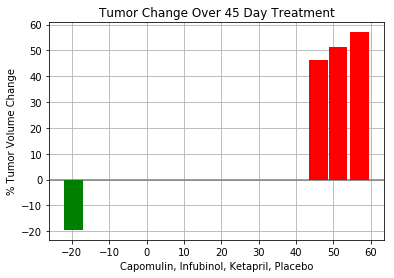

In [258]:
#Green represents a decrease in tumor size.
#Red represents an increase in tumor size.
fig, ax = plt.subplots()
x_axis= tumor_vol_changes
ax.bar(x_axis, below_threshold, 5, color="g", zorder=3)
ax.bar(x_axis, above_threshold, 5, color="r", zorder=3)
ax.axhline(0, color='grey')
ax.grid(zorder=0)
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("Capomulin, Infubinol, Ketapril, Placebo")


plt.savefig('Tumor Change After 45 Days.png') 

Analysis

Based on the Mice Survival % graph, Capomulin had the highest survival percentage compared to the other drugs.
Capomulin only lost 4 mice over 45 days (the duration of the drug treatment). 
Infubinol only had 9 mice survive at the end of the treatment, that's 36% of the total mice at the beginning of the study. 

Based on the Tumor Response to Treatment graph, Capomulin decreased on the size of the tumor over the duration of the treatment. The other drugs increased the size of the tumor. Based on the data, the other drugs were ineffective in reducing the size of the tumor.

Lastly, Capomulin also had the least amount of the metastatic spread during the treatment duration. Based on the Metastatic Spread During Treatment graph, Capomulin resulted in 1.47 sites compared to Ketapril 3.36 sites (the highest). 

After analyzing the data above, compared to the other drugs, Capomulin has sufficient evidence to be determined as the most effective drug to decrease tumor size, lowest metastatic sites, and the most mice survival percentage. 
